# Google Play Store Apps

    I first came across this dataset during one of the earlier modules. It contains a list of applications and their ratings, number of installs, price, and a number of other details about the applications. It has roughly 10,600 applications in the set. When I first used this data set, I made a scatter plot that seemed to indicate that there was no obvious relationship between the popularity (number of installs) of an application and it's rating. So, for this capstone, I wanted to see if that observation would hold up to more scrutiny.
    
## Question #1: Is there a relationship between the number of installs an app has and its rating?

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
playstore = pd.read_csv("googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,Photography,11-Feb-18,1.0.19,4.0 and up
1,Cardi B Live Stream Video Chat - Prank,DATING,4.4,28,3.4M,500+,Free,0,Everyone,Dating,16-Jul-18,2.5,4.0.3 and up
2,Live Chat - Free Video Chat Rooms,DATING,4.8,20,4.9M,500+,Free,0,Mature 17+,Dating,15-Jul-18,8.2,4.0.3 and up
3,Meet With Strangers: Video Chat & Dating,DATING,NaN,2,3.7M,500+,Free,0,Mature 17+,Dating,16-Jul-18,1,4.0 and up
4,Live chat - free video chat,DATING,NaN,1,8.7M,500+,Free,0,Mature 17+,Dating,23-Jul-18,3.52,4.0.3 and up


So, one of the first issues that I have to handle in order for the data to be usable is for the installs range to be handleable as an int rather than a string or else when it is sorted the numbers beginning in 1 will all come before those beginning in 5 regardless of their actual size. So, using the code below, I stripped the commas and pluses from the strings and converted them in to ints and added a column for these values.

In [111]:
Installs_Int = []
for install in playstore["Installs"]:
    Installs_Int.append(int(install.replace("+","").replace(",","")))
playstore["Installs_Int"] = Installs_Int
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Int
0,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,Photography,11-Feb-18,1.0.19,4.0 and up,1000
1,Cardi B Live Stream Video Chat - Prank,DATING,4.4,28,3.4M,500+,Free,0,Everyone,Dating,16-Jul-18,2.5,4.0.3 and up,500
2,Live Chat - Free Video Chat Rooms,DATING,4.8,20,4.9M,500+,Free,0,Mature 17+,Dating,15-Jul-18,8.2,4.0.3 and up,500
3,Meet With Strangers: Video Chat & Dating,DATING,NaN,2,3.7M,500+,Free,0,Mature 17+,Dating,16-Jul-18,1,4.0 and up,500
4,Live chat - free video chat,DATING,NaN,1,8.7M,500+,Free,0,Mature 17+,Dating,23-Jul-18,3.52,4.0.3 and up,500


One way to answer my question is to see if the distributions of the ratings are any different for each of the numbers of installs. So, I will take a couple of the levels and plot the histograms for each of them in order to determine if there is any obvious difference in them.

<Figure size 216x720 with 0 Axes>

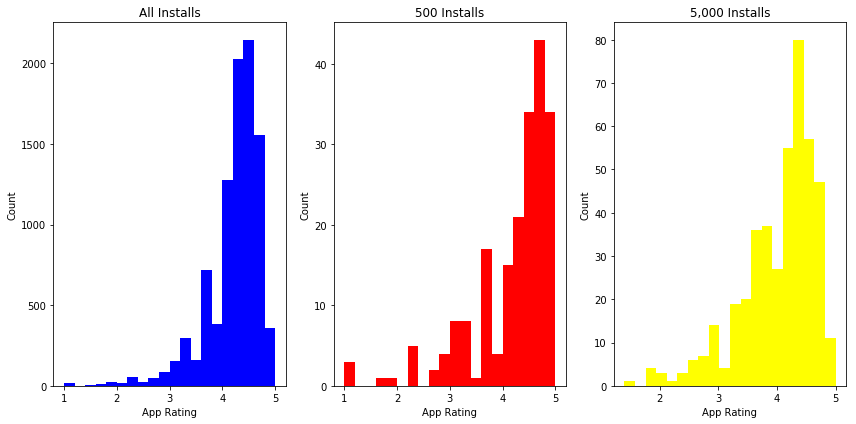

In [118]:
plt.tight_layout()
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.hist(playstore['Rating'], bins = 20, color = 'blue')
plt.xlabel('App Rating')
plt.ylabel('Count')
plt.title('All Installs')
plt.subplot(1,3,2)
plt.hist(playstore.loc[playstore['Installs_Int'] == 500]['Rating'], bins = 20, color = 'red')
plt.xlabel('App Rating')
plt.title('500 Installs')
plt.ylabel('Count')
plt.subplot(1,3,3)
plt.hist(playstore.loc[playstore['Installs_Int'] == 5000]['Rating'], bins = 20, color = 'yellow')
plt.xlabel('App Rating')
plt.title('5,000 Installs')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

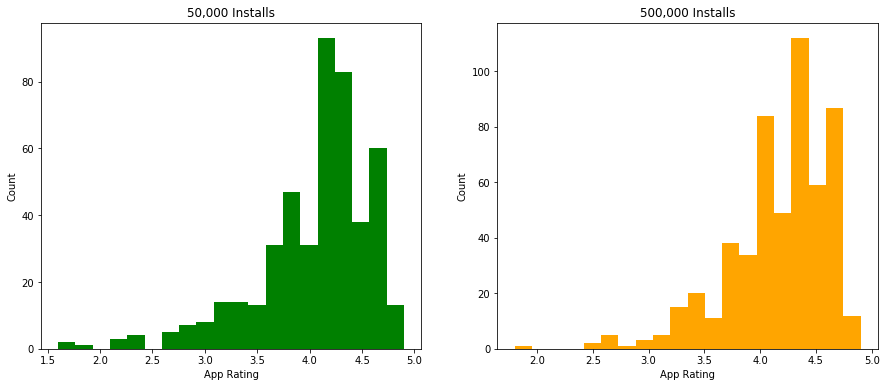

In [121]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.hist(playstore.loc[playstore['Installs_Int'] == 50000]['Rating'], bins = 20, color = 'green')
plt.xlabel('App Rating')
plt.title('50,000 Installs')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(playstore.loc[playstore['Installs_Int'] == 500000]['Rating'], bins = 20, color = 'orange')
plt.xlabel('App Rating')
plt.title('500,000 Installs')
plt.ylabel('Count')
plt.show()

Because it seems like there is no real difference in the shape of the distributions, all of them being left-skewed normal distributions, the next thing to do now is calculate the means for each group of apps with the same install amount and plot them. Originally, when I graphed this the points where much too dispersed, so instead of using the actual number of installs, I took the 10th root, making the graph more readable. Once this is done, it does appear like there is some sort of pattern to the ratings, but, rather than gradually increasing as one might expect, they seem to increase and decrease at different points along the line.

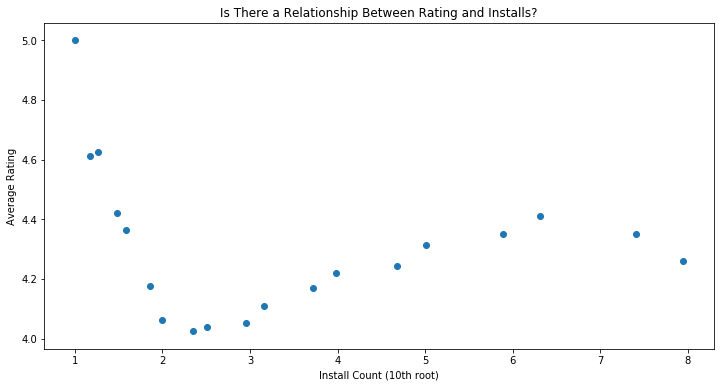

In [93]:
playstore = playstore.sort_values("Installs_Int")
means = np.array(playstore.groupby("Installs_Int").aggregate(np.mean)["Rating"])
count = np.array(playstore.groupby("Installs_Int").count()["App"])
variance = np.array(playstore.groupby("Installs_Int").aggregate(np.var)["Rating"])
plt.scatter(x = playstore["Installs_Int"].unique()**.1, y = means)
plt.xlabel("Install Count (10th root)")
plt.ylabel("Average Rating")
plt.title("Is There a Relationship Between Rating and Installs?")
plt.rcParams['figure.figsize'] = [15,9]
plt.show()

While the pattern is pretty distinctive in the graph above, the ratings are pretty close together, and, while there are almost 11,000 data points in the set, it still isn't definitive, so to check an make sure that the differences between the means of each group is statistically significant, I have to do a t-test on every possible pair of samples. While, it doesn't seem super conclusive, there is a statistically significant difference between most of the means and those of the previous group, particularly for those with a higher number of installs, so we can be reasonably confident that the relationship between the ratings and installs is as shown in the graph above.

In [94]:
for x in range(len(playstore["Installs_Int"].unique())-1):
    print(str(playstore["Installs_Int"].unique()[x]) + ": " + str(scp.ttest_ind([rating for rating in playstore.loc[playstore["Installs_Int"] == playstore["Installs_Int"].unique()[x]]["Rating"] if not math.isnan(rating)],[rating for rating in playstore.loc[playstore["Installs_Int"] == playstore["Installs_Int"].unique()[x+1]]["Rating"] if not math.isnan(rating)],equal_var = False).pvalue < .1))

0: False
1: False
5: False
10: False
50: False
100: True
500: True
1000: False
5000: False
10000: False
50000: True
100000: True
500000: True
1000000: False
5000000: True
10000000: True
50000000: True
100000000: True
500000000: True


## Conclusion 1: There seems to be a relationship, but the pattern goes up and down, rather than more popular apps being better rated.

The dataset that I have been using up to now came with another one which contains a collection of reviews for apps contained in the other dataset and ratings for the polarity and subjectivity of the opinions expressed in each. So, even if the actual ratings don't follow the predicted pattern, there is a possibility that the opinions in the reviews do. Maybe, because people expect that a more popular application is of a higher quality and rate it accordingly. There is a possibility that this would then affect the numerical rating that they give an app, while the actual criticism that they have is unaffected.

## Question 2: What is the relationship between the number of installs and the opinions expressed in the reviews of an application?

In [95]:
playstore_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
playstore_reviews = playstore_reviews.loc[playstore_reviews['Sentiment_Polarity'] >= -1]
playstore_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


This dataset contains all of the reviews on the applications from the last dataset. Each review is evaluated to determine what the polarity of the sentiment expressed in the review is on a scale from -1 to 1, with positive numbers meaning that the review expresses a positive opinion of the application and negative numbers meaning the review expresses dissatisfication. Each of these numbers is also paired with a subjectivity rating, which determines which portion of the sentiment expressed is subjective as a proportion.

In order to make this dataset answer my question, I need to find the mean polarity of reviews for every application and then match the applications in this dataset with the ones in the first dataset. After that, I can find the mean polarity for reviews on every application with a given number of installs.

In [96]:
group = pd.merge(playstore_reviews, playstore)
group1 = pd.DataFrame(group.groupby(['App'])['Sentiment_Polarity', 'Rating'].mean())
group2 = pd.DataFrame(group.groupby(['App'])['Installs_Int'].first())
group = pd.merge(group1, group2, left_index = True, right_index = True)
polarity_installs = group.groupby(['Installs_Int'])['Rating','Sentiment_Polarity'].mean()
polarity_installs

,Rating,Sentiment_Polarity
Installs_Int,,
1000,4.400000,0.404285
10000,4.286111,0.268051
50000,4.157143,0.299255
100000,4.189560,0.230802
500000,4.241538,0.231466
1000000,4.280986,0.215656
5000000,4.289365,0.210911
10000000,4.281053,0.173790
50000000,4.410000,0.128080


Now, the pattern here is pretty evident, but it would be helpful to see it displayed in a scatter plot, so I'm going to do that.

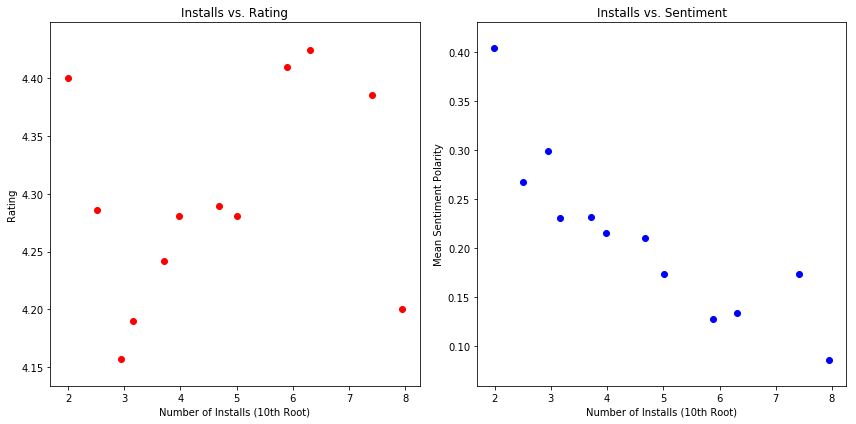

In [123]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x = polarity_installs.index**.1, y = polarity_installs['Rating'], color = 'red')
plt.ylabel("Rating")
plt.xlabel("Number of Installs (10th Root)")
plt.title("Installs vs. Rating")
plt.subplot(1, 2, 2)
plt.scatter(x = polarity_installs.index**.1, y = polarity_installs['Sentiment_Polarity'], color = 'blue')
plt.ylabel("Mean Sentiment Polarity")
plt.xlabel("Number of Installs (10th Root)")
plt.title("Installs vs. Sentiment")
plt.tight_layout()
plt.show()

So, in the dataframe and the scatter plot, we can see a pattern that is entirely counter to my initial expectations. With the increase in the number of installs, the sentiment expressed in the reviews actually gets less positive.

## Conclusion #2: As the number of installs increases, the mean value of the sentiment expressed in the reviews decreases.

The original dataset does not just evaluate the polarity of the opinions expressed in each review; it also says how subjective the opinion in each review is. There is a possibility that the downward trend is accounted for by the subjective portions of the reviews. After all, it makes sense that more popular applications, being, presumably, better funded, would be superior by objective criterion. 

## Question #2.5: What is the relationship between the objective sentiment expressed in the reviews and the number of installs?

So, in order to see if this is the case, I will take the polarity of each review, and multiply it by the portion of the review which is not subjective (one minus the value found in the 'Sentiment_Subjectivity' column) to get a value for the polarity of the objective portion of the review. Then, by the same process as before, I can find the mean value of the objective polarity for every app and then the mean value of the objective polarity for each number of installs.

In [99]:
playstore_reviews = pd.read_csv('googleplaystore_user_reviews.csv')
playstore_reviews['Objective_Polarity'] = playstore_reviews['Sentiment_Polarity']*(1-playstore_reviews['Sentiment_Subjectivity'])
playstore_reviews = playstore_reviews.loc[playstore_reviews['Objective_Polarity'] >= -1]
objective_polarity = pd.merge(group, pd.DataFrame(playstore_reviews).groupby(['App'])['Objective_Polarity'].mean(), left_index = True, right_index = True)
objective_polarity_by_installs = pd.DataFrame(objective_polarity.groupby(['Installs_Int'])['Sentiment_Polarity', 'Rating', 'Objective_Polarity'].mean())
objective_polarity_by_installs

,Sentiment_Polarity,Rating,Objective_Polarity
Installs_Int,,,
1000,0.404285,4.400000,0.121389
10000,0.268051,4.286111,0.080903
50000,0.299255,4.157143,0.112656
100000,0.230802,4.189560,0.084840
500000,0.231466,4.241538,0.082185
1000000,0.215656,4.280986,0.083149
5000000,0.210911,4.289365,0.075602
10000000,0.173790,4.281053,0.064759
50000000,0.128080,4.410000,0.057996


As before, it seems like we can see a pattern emerging, but it's still worthwhile to make the scatterplots.

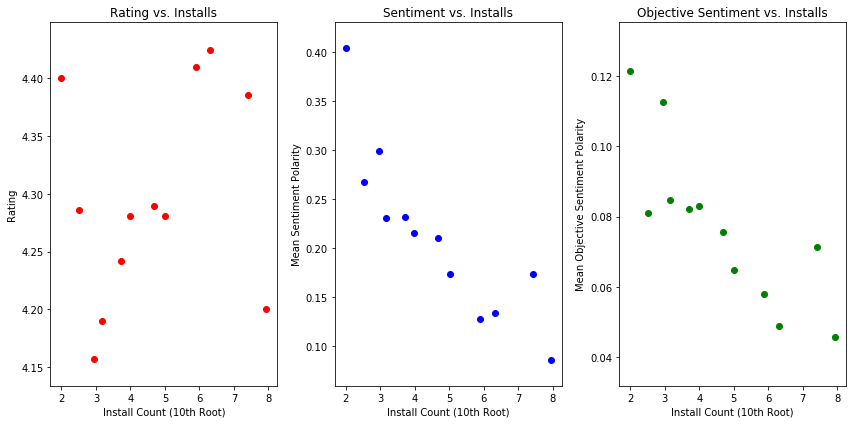

In [100]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.subplot(1,3,1)
plt.scatter(x = objective_polarity_by_installs.index**.1, y = objective_polarity_by_installs['Rating'], color = 'red')
plt.xlabel("Install Count (10th Root)")
plt.ylabel("Rating")
plt.title("Rating vs. Installs")
plt.subplot(1,3,2)
plt.scatter(x = objective_polarity_by_installs.index**.1, y = objective_polarity_by_installs['Sentiment_Polarity'], color = 'blue')
plt.xlabel("Install Count (10th Root)")
plt.ylabel("Mean Sentiment Polarity")
plt.title("Sentiment vs. Installs")
plt.subplot(1,3,3)
plt.scatter(x = objective_polarity_by_installs.index**.1, y = objective_polarity_by_installs['Objective_Polarity'], color = 'green')
plt.xlabel("Install Count (10th Root)")
plt.ylabel("Mean Objective Sentiment Polarity")
plt.title("Objective Sentiment vs. Installs")
plt.tight_layout()
plt.show()

So, the downward trend is, as before, pretty evident in both the dataframe and the scatter plots, showing that the objective portions of the reviews do not have a different pattern from the others.

## Conclusion 2.5: The objective portion of the reviews becomes less positive as the number of installs increases.

There are two possible explanations for why the sentiment becomes less positive as installs increase: people are leaving more negative reviews or the overall sentiment expressed in the reviews is just not as polarized as with less popular applications.

## Question 3: Is the decrease in positivity about more popular apps because of an increase in negativity or because of an absence of enthusiasm?

In order to answer this question, I need to append a new column to the playstore_reviews dataframe which, instead of having the sentiment polarity, has the absolute value of the sentiment polarity. Then, by the same process as before I can determine what the mean opinion strength and objective opinion strength is for every level of installs. Using this, I can also calculate the objective opinion strength, which is calculated from opinion strength the same way that objective polarity is calculated from sentiment polarity and shows the portion of the opinion which is objective.

In [101]:
playstore_reviews['Opinion_Strength'] = abs(playstore_reviews['Sentiment_Polarity'])
playstore_reviews['Objective_Opinion_Strength'] = playstore_reviews['Opinion_Strength']*(1 - playstore_reviews['Sentiment_Subjectivity'])
playstore_reviews['Objective_Polarity'] = playstore_reviews['Sentiment_Polarity']*(1 - playstore_reviews['Sentiment_Subjectivity'])
opinion_strength = pd.DataFrame(playstore_reviews.groupby(['App'])['Objective_Polarity','Opinion_Strength','Objective_Opinion_Strength'].mean())
opinion_strength = pd.merge(opinion_strength, gp, right_index = True, left_index = True)
objective_polarity = pd.DataFrame(opinion_strength.groupby(['Installs_Int'])['Sentiment_Polarity', 'Opinion_Strength', 'Objective_Polarity', 'Objective_Opinion_Strength'].mean())
objective_polarity

,Sentiment_Polarity,Opinion_Strength,Objective_Polarity,Objective_Opinion_Strength
Installs_Int,,,,
1000,0.404285,0.444471,0.121389,0.137204
10000,0.268051,0.346054,0.080903,0.114021
50000,0.299255,0.380290,0.112656,0.127605
100000,0.230802,0.330284,0.084840,0.120447
500000,0.231466,0.340412,0.082185,0.115482
1000000,0.215656,0.316663,0.083149,0.117355
5000000,0.210911,0.306917,0.075602,0.111189
10000000,0.173790,0.291152,0.064759,0.108931
50000000,0.128080,0.269303,0.057996,0.109932


Once again, the pattern is pretty noticeable in the dataframe, but it should be easier to see in the scatterplots.

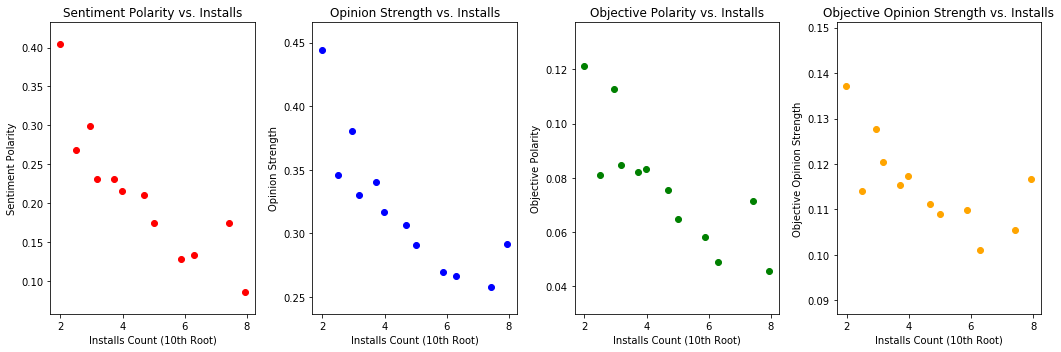

In [102]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.subplot(1,4,1)
plt.scatter(x = objective_polarity.index**.1, y = objective_polarity['Sentiment_Polarity'], color = 'red')
plt.xlabel("Installs Count (10th Root)")
plt.ylabel("Sentiment Polarity")
plt.title("Sentiment Polarity vs. Installs")
plt.subplot(1,4,2)
plt.scatter(x = objective_polarity.index**.1, y = objective_polarity['Opinion_Strength'], color = 'blue')
plt.xlabel("Installs Count (10th Root)")
plt.ylabel("Opinion Strength")
plt.title("Opinion Strength vs. Installs")
plt.subplot(1,4,3)
plt.scatter(x = objective_polarity.index**.1, y = objective_polarity['Objective_Polarity'], color = 'green')
plt.xlabel("Installs Count (10th Root)")
plt.ylabel("Objective Polarity")
plt.title("Objective Polarity vs. Installs")
plt.subplot(1,4,4)
plt.scatter(x = objective_polarity.index**.1, y = objective_polarity['Objective_Opinion_Strength'], color = 'orange')
plt.xlabel("Installs Count (10th Root)")
plt.ylabel("Objective Opinion Strength")
plt.title("Objective Opinion Strength vs. Installs")
plt.tight_layout()
plt.show()

The graphs above show that there is a corresponding decrease in the strength of the opinions as the mean polarity of the sentiments goes down, and it would appear that the slope is roughly the same. This suggests that, as predicted, it is not that the reviews on more popular apps are more negative, but rather that they are just unenthusiastic. This, in my opinion, seems much more intuitive. It makes sense that people are less likely to have very strong opinions about the applications which are fixtures of daily life.

## Conclusion 3: The declining strength of the opinions expressed in the reviews for more popular apps explains why the sentiment for those apps is generally less positive.

## Proposal:

While I feel like I was able to describe pretty effectively how the number of installs affects the sentiment expressed in the reviews, I still don't understand why, if the sentiment in the reviews decreases, the ratings that people give follow a completely seperate pattern. Also, I was only able to cover roughly 10,600 apps in the first question and only roughly 800 in the subsequent ones. Obviously, this is only a very small subset of the total number of apps available on the playstore. So, it would be helpful if analysis could be done on the whole of the applications on the playstore. In fact, it is possible that the patterns observed here are confined to only the google playstore and not other app stores, so if the same questions could be asked of the applications available on Apple's app store and any other similar marketplaces. The final thing is that more research ought to be done into the relationship between the number of installs and the rating of an app because while I did establish that there is a relationship, I have little understanding of the why.